In [2]:
pip install -r requirements.txt

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached us-2.0.2-py3-none-any.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached scipy-1.6.3-cp38-cp38-manylinux1_x86_64.whl (27.2 MB)
  Using cached jellyfish-0.6.1-cp38-cp38-linux_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import us as us

In [12]:
# for json formatted info

# with open('data/borough_data.json') as f:
#     borough_data=json.load(f)
# borough_data

with open('data/state_funding.csv') as f:
    funds_df=pd.read_csv(f, delimiter=',')

In [25]:
funds_df.head()

,State,Total Funding,Funding Based on Average Number of Unemployed,Funding from Even Distribution,CRF Top-Up
0,Alabama,"$2,120,279,417.00","$1,620,279,417.00","$500,000,000.00",$0.00
1,Alaska,"$1,011,788,220.00","$511,788,220.00","$500,000,000.00",$0.00
2,Arizona,"$4,182,827,491.60","$3,682,827,491.60","$500,000,000.00",$0.00
3,Arkansas,"$1,573,121,580.80","$1,073,121,580.80","$500,000,000.00",$0.00
4,California,"$27,017,016,860.10","$26,517,016,860.10","$500,000,000.00",$0.00


In [199]:
funds_df = funds_df.drop(labels=['Funding Based on Average Number of Unemployed', 'Funding from Even Distribution', 'CRF Top-Up'], axis=1) #only interested in the total funding

funds_df.loc[:, "Total Funding"] = funds_df.loc[:, "Total Funding"].str.replace(r"$", "", regex=True)
funds_df.loc[:, "Total Funding"] = funds_df.loc[:, "Total Funding"].str.replace(r".", "", regex=True)
funds_df.loc[:, "Total Funding"] = funds_df.loc[:, "Total Funding"].str.replace(r",", "", regex=True) #remove irrelevant characters from numerics
funds_df = pd.melt(funds_df, id_vars=['State'], value_vars=['Total Funding'], ignore_index=True) #reorganizing the dataframe with the states as index values
funds_df = funds_df.drop(labels="variable", axis=1)
funds_df = funds_df.dropna()
funds_df = funds_df.rename({"value":"Total Funds"}, axis=1)
funds_df.head()

,State,Total Funds
0,Alabama,212027941700
1,Alaska,101178822000
2,Arizona,418282749160
3,Arkansas,157312158080
4,California,2701701686010


In [200]:
#responsible for converting the monetary values to billions
def convert_to_billions(vals):
    new_vals = []
    for val in vals:
        val = val.replace(val[-8:], "")
        val = val[0:len(val) - 3] + '.' + val[-3:]
        new_vals.append(val)
    return new_vals

vals = funds_df["Total Funds"].values
funds_df["Total Funds"] = pd.Series(convert_to_billions(vals))
funds_df = pd.DataFrame(data=funds_df["Total Funds"].values, index=funds_df["State"], columns=["Total Funds (in billions)"] )

,State,Total Funds
0,Alabama,2.120
1,Alaska,1.011
2,Arizona,4.182
3,Arkansas,1.573
4,California,27.017
5,Colorado,3.828
6,Connecticut,2.812
7,Delaware,.924
8,District of Columbia,1.802
9,Florida,8.816


In [213]:
# saved the df as csv
# funds_df.to_csv('data/cleaned_state_funds.csv')

In [3]:
with open('data/cleaned_state_funds.csv') as f:
    clean_funds_df=pd.read_csv(f, delimiter=',')

In [9]:
clean_funds_df = clean_funds_df.copy().drop(index=51)

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Arkansas'),
 Text(4, 0, 'California'),
 Text(5, 0, 'Colorado'),
 Text(6, 0, 'Connecticut'),
 Text(7, 0, 'Delaware'),
 Text(8, 0, 'District of Columbia'),
 Text(9, 0, 'Florida'),
 Text(10, 0, 'Georgia'),
 Text(11, 0, 'Hawaii'),
 Text(12, 0, 'Idaho'),
 Text(13, 0, 'Illinois'),
 Text(14, 0, 'Indiana'),
 Text(15, 0, 'Iowa'),
 Text(16, 0, 'Kansas'),
 Text(17, 0, 'Kentucky'),
 Text(18, 0, 'Louisiana'),
 Text(19, 0, 'Maine'),
 Text(20, 0, 'Maryland'),
 Text(21, 0, 'Massachusetts'),
 Text(22, 0, 'Michigan'),
 Text(23, 0, 'Minnesota'),
 Text(24, 0, 'Mississippi'),
 Text(25, 0, 'Missouri'),
 Text(26, 0, 'Montana'),
 Text(27, 0, 'Nebraska'),
 Text(28, 0, 'Nevada'),
 Text(29, 0, 'New Hampshire'),
 Text(30, 0, 'New Jersey'),
 Text(31, 0, 'New Mexico'),
 Text(32, 0, 'New York'),
 Text(33, 0, 'North Carolina'),
 Text(34, 0, 'North Dakota'),
 Text(35, 0, 'Ohio'),
 Text(36, 0, 'Oklahoma'),
 Text(37, 0, 'Oregon'),
 Text(

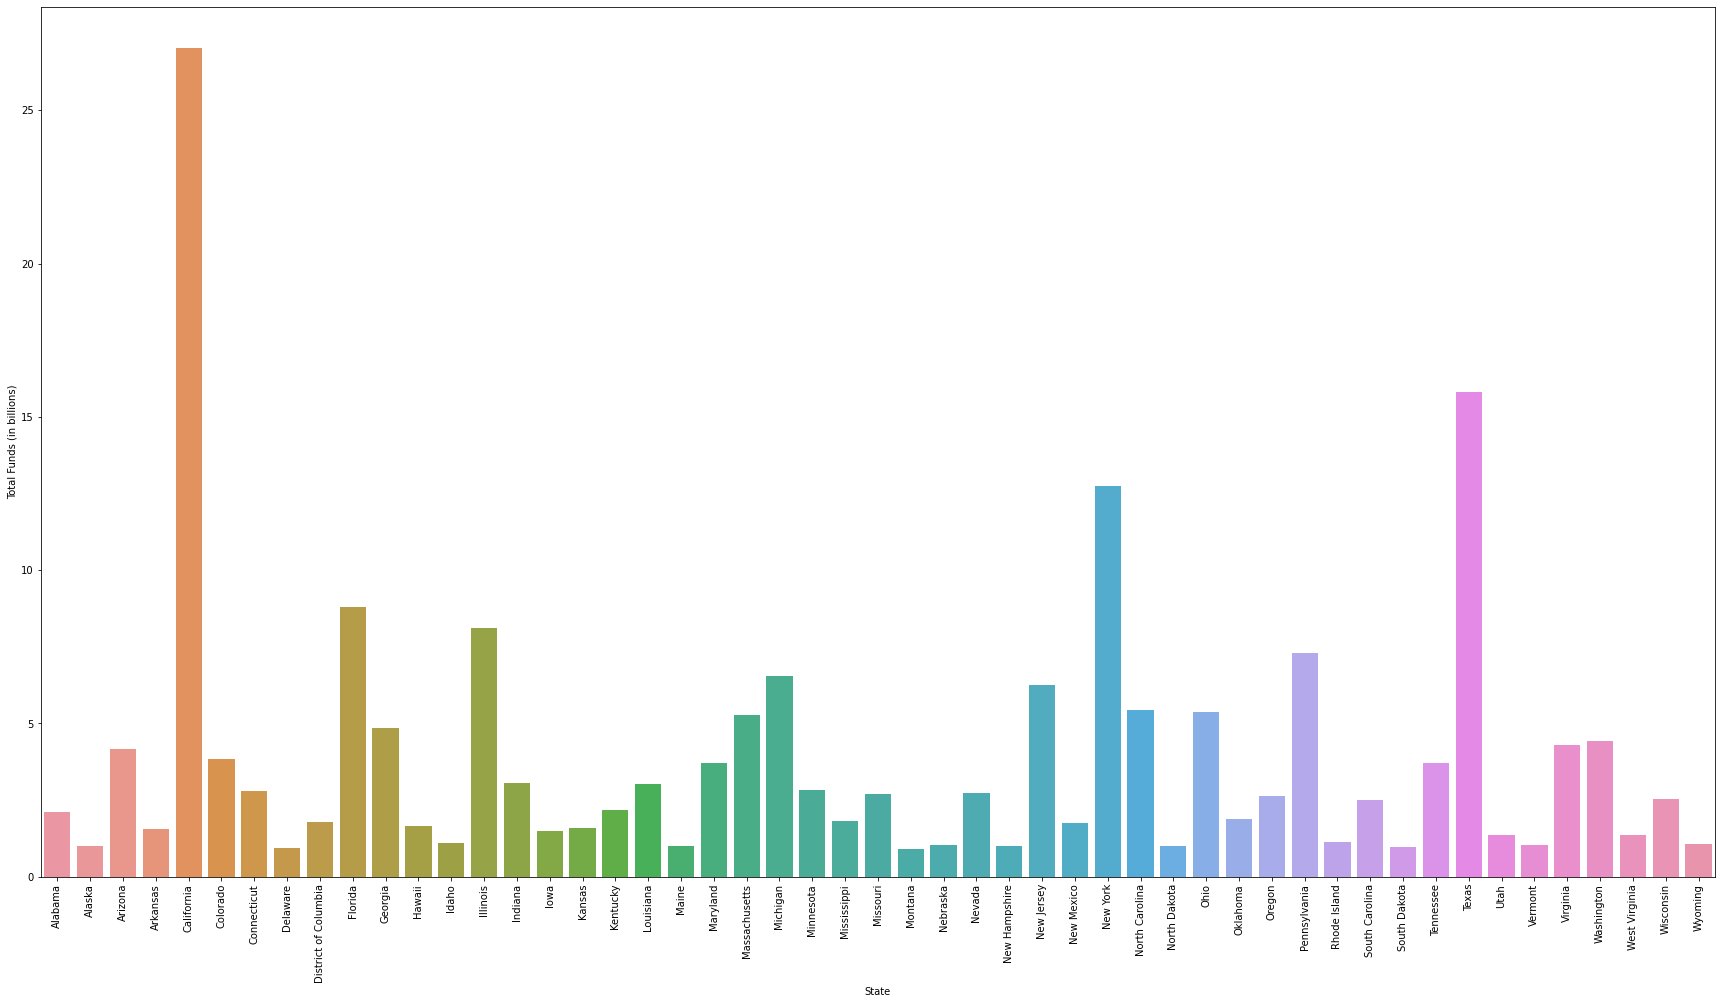

In [10]:
fig, ax = plt.subplots(figsize=(30,16))
plt.subplots_adjust(hspace=0.5)

ax = sns.barplot(data=clean_funds_df, x=clean_funds_df.State, y=clean_funds_df['Total Funds (in billions)'])
ax.set_xticklabels(labels=clean_funds_df.State, rotation=90)

## Processing HRR datasets

In [4]:
with open('data/HRR_perc_20.csv') as f:
    HRR_20_df=pd.read_csv(f, delimiter=',')
    
with open('data/HRR_perc_40.csv') as f:
    HRR_40_df=pd.read_csv(f, delimiter=',')
    
with open('data/HRR_perc_60.csv') as f:
    HRR_60_df=pd.read_csv(f, delimiter=',')

In [6]:
HRR_20_df = HRR_20_df.dropna()
def city_to_state(vals):
    new_vals = []
    for val in vals:
        val = str(us.states.lookup(val[-2:]))
        new_vals.append(val)
    return new_vals

In [7]:
HRR_20_df['HRR'] = city_to_state(HRR_20_df.HRR.values)
HRR_20_df

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
1,Texas,980,127,565,772,68.0,98,"226,444","50,412","45,289",...,142%,109%,70,103%,71%,55%,45,66%,46%,35%
2,Ohio,"1,358",186,518,938,94.0,140,"547,990","111,042","109,598",...,236%,178%,165,176%,118%,89%,108,115%,77%,58%
3,California,"2,695",293,665,"1,680",139.0,216,"1,310,189","214,991","262,038",...,352%,259%,380,273%,176%,130%,248,178%,115%,85%
4,Georgia,704,60,221,462,27.0,43,"157,143","30,466","31,429",...,219%,157%,47,174%,109%,78%,31,115%,72%,52%
5,New York,"4,804",425,"1,579","3,191",193.0,309,"1,477,723","318,695","295,545",...,292%,212%,452,234%,146%,106%,294,152%,95%,69%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,North Carolina,"2,870",499,843,"1,857",40.0,269,"899,862","197,294","179,972",...,205%,111%,276,690%,103%,55%,180,450%,67%,36%
302,Massachusetts,"1,525",169,425,975,43.0,106,"652,386","122,123","130,477",...,365%,229%,194,451%,183%,115%,126,293%,119%,75%
303,Washington,369,58,200,285,33.0,45,"220,972","40,707","44,194",...,291%,226%,65,197%,144%,112%,43,130%,96%,74%
304,Pennsylvania,868,79,267,567,8.0,43,"343,334","73,773","68,667",...,488%,266%,105,1313%,244%,133%,68,850%,158%,86%


In [18]:
HRR_20_df['HRR'].unique()

array(['Texas', 'Ohio', 'California', 'Georgia', 'New York', 'New Mexico',
       'Louisiana', 'Pennsylvania', 'Alaska', 'Michigan', 'Wisconsin',
       'Virginia', 'North Carolina', 'Illinois', 'Maryland', 'Maine',
       'Oregon', 'Montana', 'Alabama', 'North Dakota', 'Idaho',
       'Massachusetts', 'Colorado', 'Florida', 'Connecticut', 'Vermont',
       'New Jersey', 'Missouri', 'Wyoming', 'Iowa', 'South Carolina',
       'West Virginia', 'Tennessee', 'Kentucky', 'Minnesota', 'Indiana',
       'Washington', 'Arkansas', 'Mississippi', 'Hawaii', 'Nevada',
       'Oklahoma', 'New Hampshire', 'Nebraska', 'Arizona', 'Utah',
       'Rhode Island', 'South Dakota', 'Kansas', 'District of Columbia',
       'Delaware'], dtype=object)

In [240]:
# HRR_20_df.groupby(['HRR']).sum()
HRR_20_df.dtypes
# need to replace special characters (% , .) and convert objects to numerics
# for percentage columns, left shift twice

HRR                                                                      object
Total Hospital Beds                                                      object
Total ICU Beds                                                           object
Available Hospital Beds                                                  object
Potentially Available Hospital Beds*                                     object
Available ICU Beds                                                      float64
Potentially Available ICU Beds*                                          object
Adult Population                                                         object
Population 65+                                                           object
Projected Infected Individuals                                           object
Projected Hospitalized Individuals                                       object
Projected Individuals Needing ICU Care                                   object
Hospital Beds Needed, Six Months        